# <center>Financial Portfolio Optimization</center>

In [48]:
from ml import data_preprocessing as dp
from ml import forecasting as fc
from ga import cov_ga as cga
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

In [40]:
selected_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']

In [41]:
df = dp.load_data("data/prices.csv", selected_symbols)
returns = dp.compute_returns(df)
norm_returns = dp.normalize_returns(returns)

d:\University\4th Year\CM4601 Computational Intelligence\ea-portfolio-optimization\ml\data_preprocessing.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivoted = df_pivoted.fillna(method='ffill').dropna()


In [42]:
expected_returns = fc.forecast_returns_arima(norm_returns, forecast_horizon=1)
cov_matrix = fc.compute_covariance_matrix(norm_returns)

c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

In [43]:
ga = cga.GeneticOptimizer(
    pop_size=50,
    ngen=20, 
    tourn_size=3, 
    cxpb=0.7, 
    mutpb=0.2, 
    mut_step=0.05, 
    risk_free_rate=0.0
    )

In [44]:
best_ind, best_fit, best_fits = ga.run(expected_returns, cov_matrix)

Best Fitness (Sharpe): 0.009640084242135884
Best Portfolio Allocation:
AAPL: 0.2518
AMZN: 0.7470
GOOGL: 0.0012
JPM: 0.0000
MSFT: 0.0000


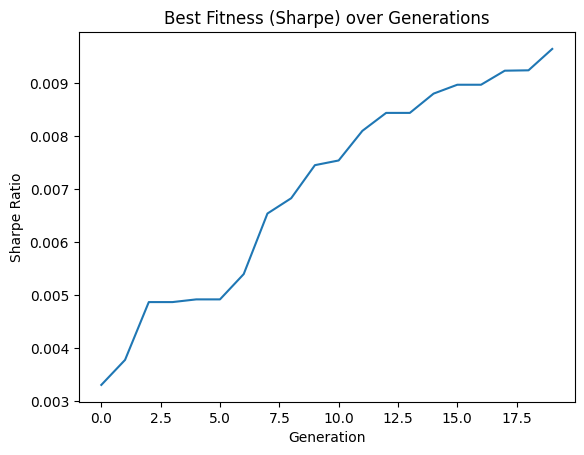

In [45]:
plt.plot(best_fits)
plt.title('Best Fitness (Sharpe) over Generations')
plt.xlabel('Generation')
plt.ylabel('Sharpe Ratio')
plt.show()

# GA Validation

We compare the GA-optimized portfolio to a basic, naive portfolio strategy. For instance, a common benchmark is an equal-weighted portfolio, where each selected stock receives an identical allocation (e.g., if there are 5 stocks, each weight = 0.2).

In [50]:
def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.0):
    # Compute portfolio return
    port_return = np.dot(weights, expected_returns)
    # Compute portfolio variance and volatility
    port_variance = weights @ cov_matrix @ weights
    port_vol = np.sqrt(port_variance) if port_variance > 0 else 1e-6
    # Compute Sharpe ratio
    return (port_return - risk_free_rate) / port_vol

def equal_weighted_portfolio(num_stocks):
    # Equal allocation among all selected stocks
    return np.array([1.0 / num_stocks] * num_stocks)

def validate_ga_solution(best_ind, expected_returns, cov_matrix, selected_symbols):
    # Compute Sharpe ratio of the GA's solution
    ga_weights = np.array(best_ind)
    ga_sharpe = sharpe_ratio(ga_weights, expected_returns, cov_matrix)

    # Compute Sharpe ratio of an equal-weighted benchmark
    eq_weights = equal_weighted_portfolio(len(selected_symbols))
    eq_sharpe = sharpe_ratio(eq_weights, expected_returns, cov_matrix)
    
    # Print results
    print("\n=== Validation Results ===")
    print("GA-Optimized Portfolio Sharpe:", ga_sharpe)
    print("Equal-Weighted Portfolio Sharpe:", eq_sharpe)

    if ga_sharpe > eq_sharpe:
        print("GA solution outperforms the equal-weighted benchmark.")
    else:
        print("Benchmark outperforms or matches the GA solution. Consider parameter tuning or re-running.")


In [51]:
validate_ga_solution(best_ind, expected_returns, cov_matrix, selected_symbols)


=== Validation Results ===
GA-Optimized Portfolio Sharpe: 0.009640084242135884
Equal-Weighted Portfolio Sharpe: -0.013765137991732842
GA solution outperforms the equal-weighted benchmark.
